In [1]:
#pip install wordcloudp


In [2]:
#pip install emot --upgrade

In [3]:
#pip install -U textblob

In [4]:
#pip install vaderSentiment

# Data Wrangling

In [5]:
import configparser
import tweepy
import numpy as np
import pandas as pd
from wordcloud import WordCloud, ImageColorGenerator
from emot.emo_unicode import UNICODE_EMOJI # For emojis
import re
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import nltk
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords       # to get stopwords from NLTK library
from nltk.tokenize import word_tokenize # to create word tokens
from nltk.stem import WordNetLemmatizer # to reduce words to orginal form
from nltk.corpus import words           # Get all words in english 


import string
import random
from PIL import Image

import textblob
from textblob import TextBlob

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Fati\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Fati\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
api_key = config["twitter"]["api_key"]
api_key_secret = config["twitter"]["api_key_secret"] 

access_token = config["twitter"]["access_token"]
access_token_secret = config["twitter"]["access_token_secret"]

# Authentication
auth = tweepy.OAuthHandler(api_key, api_key_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

# keyword used is the hastag #ZenithBankbringbackmymoney# and spec
keywords = "@ZenithBank OR #ZenithBankreturnmymoney OR #ZenithBank"
limit = 10000
#tweets = tweepy.cursor(api.search_tweets, q = keywords, count = 100, tweet_mood = "extended").items(limit)
tweets = tweepy.Cursor(api.search_tweets, q=keywords, count=100, lang = "en", tweet_mode='extended').items(limit)
#creat dataframe 
columns = ['id', 'Time', 'User', 'Tweet', 'No of retweet', 'likes', 'Country',
       'Tweet source', 'Verified']
data = []
for tweet in tweets:
    data.append([tweet.id, tweet.created_at, tweet.user.screen_name, tweet.full_text, tweet.retweet_count, tweet.favorite_count, tweet.user.location, tweet.source, tweet.user.verified])
df = pd.DataFrame(data, columns = columns)
df.to_csv("tweets9.csv")

In [ ]:
# nltk.download('wordnet')

In [86]:
#nltk.download('omw-1.4')

In [8]:
df1 = pd.read_csv("tweets4.csv")
df2 = pd.read_csv("tweets5.csv")
df3 = pd.read_csv("tweets6.csv")
df4= pd.read_csv("tweets7.csv")
df5= pd.read_csv("tweets8.csv")
df6 = pd.read_csv("tweets9.csv")

### column Description
* id - Unique id for each tweet
* user - The twitter username of the tweeter
* Time - The time the tweet was tweeted
* tweet - The content of the tweet
* Country - Location of Tweeter
* No of retweets - The number of times the tweet has been retweeted
* likes - The number of times the tweet has been liked
* verified - Whether the Tweeter is verified or not? True/False
* tweet_source - The Source of Tweet


In [9]:
# checking for the date of start for each datafraome
df1.Time.min(), df2.Time.min(), df3.Time.min(), df4.Time.min(), df5.Time.min(), df6.Time.min()

('2023-01-23 05:45:21+00:00',
 '2023-01-25 06:24:01+00:00',
 '2023-01-22 17:25:45+00:00',
 '2023-01-23 10:35:52+00:00',
 '2023-01-31 19:36:58+00:00',
 '2023-02-06 20:28:50+00:00')

In [10]:
# checking for the end data for of the data frame 
df2.Time.max(), df2.Time.max(), df3.Time.max(), df4.Time.max(), df5.Time.max(), df6.Time.max()


('2023-01-31 10:32:29+00:00',
 '2023-01-31 10:32:29+00:00',
 '2023-01-31 10:32:29+00:00',
 '2023-01-31 10:32:29+00:00',
 '2023-02-02 11:47:24+00:00',
 '2023-02-08 10:35:58+00:00')

In [11]:
# concatenate the 6 datafraome
df = pd.concat([df1, df2, df3, df4, df5], ignore_index = True)

In [12]:
# check the 
df

,Unnamed: 0,id,Time,User,Tweet,No of retweet,likes,Country,Tweet source,Verified
0,0,1.620000e+18,2023-01-30 10:06:43+00:00,iamAbode,@EliteTweets01 @ZenithBank Lol,0,0,Worldwide,Twitter for Android,False
1,1,1.620000e+18,2023-01-30 10:06:10+00:00,mizluminous,@ZenithBank I just came back from one of your ...,0,0,"Lagos, Nigeria",Twitter for Android,False
2,2,1.620000e+18,2023-01-30 10:06:09+00:00,Aramunsh,@oluwagentle0 @ZenithBank 4K??? Dat na person ...,0,0,NaN,Twitter for iPhone,False
3,3,1.620000e+18,2023-01-30 10:06:00+00:00,victorobiefuna,Dear @gtbank @gtbank_help and @ZenithBank have...,0,0,NaN,Twitter for Android,False
4,4,1.620000e+18,2023-01-30 10:04:57+00:00,OJA_Azinmagba,E no go better for the people wey dey rate @Ze...,0,0,Lagos Nigeria,Twitter for iPhone,False
...,...,...,...,...,...,...,...,...,...,...
53476,9995,1.620507e+18,2023-01-31 19:37:28+00:00,apolloson_,RT @Mr_Madox: @ZenithBank Today I noticed that...,1528,0,Westeros,Twitter for iPhone,False
53477,9996,1.620507e+18,2023-01-31 19:37:21+00:00,Obi_anuju,RT @a_ma_ka__: Please Nigerians keep tagging @...,19028,0,NaN,Twitter for iPhone,False
53478,9997,1.620506e+18,2023-01-31 19:37:05+00:00,dude_rash,@Marteelda @Babarjide @ZenithBank @UBAGroup Cl...,0,0,"Federal Capital Territory, Nig",Twitter for Android,False
53479,9998,1.620506e+18,2023-01-31 19:37:00+00:00,sinmileoluwa_,RT @Mr_Madox: @ZenithBank Today I noticed that...,1528,0,🌍 Worldwide,Twitter for Android,False


In [13]:
# check the shape of the data
df.shape

(53481, 10)

we have 53481 data entry (rows) and 10 columns

In [14]:
# Check for the general overview and concise summary of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53481 entries, 0 to 53480
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     53481 non-null  int64  
 1   id             53481 non-null  float64
 2   Time           53481 non-null  object 
 3   User           53481 non-null  object 
 4   Tweet          53481 non-null  object 
 5   No of retweet  53481 non-null  int64  
 6   likes          53481 non-null  int64  
 7   Country        35750 non-null  object 
 8   Tweet source   53481 non-null  object 
 9   Verified       53481 non-null  bool   
dtypes: bool(1), float64(1), int64(3), object(5)
memory usage: 3.7+ MB


we have both numerical and categorical data

In [15]:
# check for duplicates
df.duplicated().sum()

220

69,081 of the data is duplicated

In [16]:
# checking for missing data
df.isnull().sum()

Unnamed: 0           0
id                   0
Time                 0
User                 0
Tweet                0
No of retweet        0
likes                0
Country          17731
Tweet source         0
Verified             0
dtype: int64

There are quite a number of missing values 

In [17]:
# check for the unique count for each column
df.nunique()

Unnamed: 0       12396
id               23159
Time             22374
User             16016
Tweet            14949
No of retweet      108
likes              111
Country           3775
Tweet source        23
Verified             2
dtype: int64

In [18]:
# check thew overral dtypes
df.dtypes

Unnamed: 0         int64
id               float64
Time              object
User              object
Tweet             object
No of retweet      int64
likes              int64
Country           object
Tweet source      object
Verified            bool
dtype: object

In [19]:
# check the statistical representation
df.describe()

,Unnamed: 0,id,No of retweet,likes
count,53481.000000,5.348100e+04,53481.000000,53481.000000
mean,5389.620239,1.619341e+18,363.984462,1.307679
std,3163.321583,9.847662e+14,1161.504855,45.748449
min,0.000000,1.617212e+18,0.000000,0.000000
25%,2674.000000,1.618740e+18,0.000000,0.000000
50%,5348.000000,1.619190e+18,0.000000,0.000000
75%,8022.000000,1.620086e+18,183.000000,1.000000
max,12395.000000,1.621113e+18,19028.000000,5247.000000


### General Observation
* Wrong labelling of datatypes
* unnecessary columns "unnamed"
* missing values in so many columns
* duplicate entry

## Data cleaning

making a copy of the data before cleaning

In [20]:
df = df.copy()

In [21]:
# convert the time from Object to datetime
df.Time = df.Time.apply(pd.to_datetime)

In [22]:
# Dropping irrelevan columns such as "Unnmaed"
df.drop("Unnamed: 0", axis = 1, inplace = True)


In [23]:
df

,id,Time,User,Tweet,No of retweet,likes,Country,Tweet source,Verified
0,1.620000e+18,2023-01-30 10:06:43+00:00,iamAbode,@EliteTweets01 @ZenithBank Lol,0,0,Worldwide,Twitter for Android,False
1,1.620000e+18,2023-01-30 10:06:10+00:00,mizluminous,@ZenithBank I just came back from one of your ...,0,0,"Lagos, Nigeria",Twitter for Android,False
2,1.620000e+18,2023-01-30 10:06:09+00:00,Aramunsh,@oluwagentle0 @ZenithBank 4K??? Dat na person ...,0,0,NaN,Twitter for iPhone,False
3,1.620000e+18,2023-01-30 10:06:00+00:00,victorobiefuna,Dear @gtbank @gtbank_help and @ZenithBank have...,0,0,NaN,Twitter for Android,False
4,1.620000e+18,2023-01-30 10:04:57+00:00,OJA_Azinmagba,E no go better for the people wey dey rate @Ze...,0,0,Lagos Nigeria,Twitter for iPhone,False
...,...,...,...,...,...,...,...,...,...
53476,1.620507e+18,2023-01-31 19:37:28+00:00,apolloson_,RT @Mr_Madox: @ZenithBank Today I noticed that...,1528,0,Westeros,Twitter for iPhone,False
53477,1.620507e+18,2023-01-31 19:37:21+00:00,Obi_anuju,RT @a_ma_ka__: Please Nigerians keep tagging @...,19028,0,NaN,Twitter for iPhone,False
53478,1.620506e+18,2023-01-31 19:37:05+00:00,dude_rash,@Marteelda @Babarjide @ZenithBank @UBAGroup Cl...,0,0,"Federal Capital Territory, Nig",Twitter for Android,False
53479,1.620506e+18,2023-01-31 19:37:00+00:00,sinmileoluwa_,RT @Mr_Madox: @ZenithBank Today I noticed that...,1528,0,🌍 Worldwide,Twitter for Android,False


In [24]:
# check to see if the column has successfully droped
df.columns.to_list()

['id',
 'Time',
 'User',
 'Tweet',
 'No of retweet',
 'likes',
 'Country',
 'Tweet source',
 'Verified']

Confirmed irrelevant column has dropped successfully

#### Drop or Replace missing values where necessary

In [25]:
# Fill the location(country) with No location
df.Country.fillna("No Location", inplace = True)

In [26]:
# fill the Tweet source with Not specified
df["Tweet source"].fillna("not specified", inplace = True)

In [27]:
# fill the likes with 0
df.likes.fillna(0, inplace = True)

we are going to drop any null in the verified and id columns because it is of no use since we dont know the id of this tweet and it is not indicated either it is verified or not

In [28]:
df.Verified .dropna(inplace = True)

In [29]:
df.id.dropna(axis = 0, inplace = True)

In [30]:
df.isnull().sum()

id               0
Time             0
User             0
Tweet            0
No of retweet    0
likes            0
Country          0
Tweet source     0
Verified         0
dtype: int64

In [31]:
df

,id,Time,User,Tweet,No of retweet,likes,Country,Tweet source,Verified
0,1.620000e+18,2023-01-30 10:06:43+00:00,iamAbode,@EliteTweets01 @ZenithBank Lol,0,0,Worldwide,Twitter for Android,False
1,1.620000e+18,2023-01-30 10:06:10+00:00,mizluminous,@ZenithBank I just came back from one of your ...,0,0,"Lagos, Nigeria",Twitter for Android,False
2,1.620000e+18,2023-01-30 10:06:09+00:00,Aramunsh,@oluwagentle0 @ZenithBank 4K??? Dat na person ...,0,0,No Location,Twitter for iPhone,False
3,1.620000e+18,2023-01-30 10:06:00+00:00,victorobiefuna,Dear @gtbank @gtbank_help and @ZenithBank have...,0,0,No Location,Twitter for Android,False
4,1.620000e+18,2023-01-30 10:04:57+00:00,OJA_Azinmagba,E no go better for the people wey dey rate @Ze...,0,0,Lagos Nigeria,Twitter for iPhone,False
...,...,...,...,...,...,...,...,...,...
53476,1.620507e+18,2023-01-31 19:37:28+00:00,apolloson_,RT @Mr_Madox: @ZenithBank Today I noticed that...,1528,0,Westeros,Twitter for iPhone,False
53477,1.620507e+18,2023-01-31 19:37:21+00:00,Obi_anuju,RT @a_ma_ka__: Please Nigerians keep tagging @...,19028,0,No Location,Twitter for iPhone,False
53478,1.620506e+18,2023-01-31 19:37:05+00:00,dude_rash,@Marteelda @Babarjide @ZenithBank @UBAGroup Cl...,0,0,"Federal Capital Territory, Nig",Twitter for Android,False
53479,1.620506e+18,2023-01-31 19:37:00+00:00,sinmileoluwa_,RT @Mr_Madox: @ZenithBank Today I noticed that...,1528,0,🌍 Worldwide,Twitter for Android,False


In [32]:
df.drop_duplicates(inplace = True)

In [33]:
df.reset_index(drop = True, inplace = True)

In [34]:
df

,id,Time,User,Tweet,No of retweet,likes,Country,Tweet source,Verified
0,1.620000e+18,2023-01-30 10:06:43+00:00,iamAbode,@EliteTweets01 @ZenithBank Lol,0,0,Worldwide,Twitter for Android,False
1,1.620000e+18,2023-01-30 10:06:10+00:00,mizluminous,@ZenithBank I just came back from one of your ...,0,0,"Lagos, Nigeria",Twitter for Android,False
2,1.620000e+18,2023-01-30 10:06:09+00:00,Aramunsh,@oluwagentle0 @ZenithBank 4K??? Dat na person ...,0,0,No Location,Twitter for iPhone,False
3,1.620000e+18,2023-01-30 10:06:00+00:00,victorobiefuna,Dear @gtbank @gtbank_help and @ZenithBank have...,0,0,No Location,Twitter for Android,False
4,1.620000e+18,2023-01-30 10:04:57+00:00,OJA_Azinmagba,E no go better for the people wey dey rate @Ze...,0,0,Lagos Nigeria,Twitter for iPhone,False
...,...,...,...,...,...,...,...,...,...
38096,1.620507e+18,2023-01-31 19:37:28+00:00,apolloson_,RT @Mr_Madox: @ZenithBank Today I noticed that...,1528,0,Westeros,Twitter for iPhone,False
38097,1.620507e+18,2023-01-31 19:37:21+00:00,Obi_anuju,RT @a_ma_ka__: Please Nigerians keep tagging @...,19028,0,No Location,Twitter for iPhone,False
38098,1.620506e+18,2023-01-31 19:37:05+00:00,dude_rash,@Marteelda @Babarjide @ZenithBank @UBAGroup Cl...,0,0,"Federal Capital Territory, Nig",Twitter for Android,False
38099,1.620506e+18,2023-01-31 19:37:00+00:00,sinmileoluwa_,RT @Mr_Madox: @ZenithBank Today I noticed that...,1528,0,🌍 Worldwide,Twitter for Android,False


#### now we have 38, 101 clean dataset 
we will store this datset in a csv file

In [35]:
df.to_csv("cleaned_zenith_dataset.csv")

# Data Preprocessing

the data process here involves all the data cleaning to prepare the tweet data for sentiment analysis. several functions were created to apply to the tweet column to obtain a desirable result.

In [36]:
# define a fucntion to get the hastags used out of te tweet. for this the REGEX(Regular Expression) function was used
def gethastags(Tweet):
    Tweet = Tweet.lower() # convert all the tweet to a lower case
    Tweet = re.findall(r"\#\wt", Tweet)
    return " ".join(Tweet)

In [37]:
# getteing the hastags and storing them in a column in our dataframe
df["hashtag"] = df.Tweet.apply(gethastags)

In [38]:
df

,id,Time,User,Tweet,No of retweet,likes,Country,Tweet source,Verified,hashtag
0,1.620000e+18,2023-01-30 10:06:43+00:00,iamAbode,@EliteTweets01 @ZenithBank Lol,0,0,Worldwide,Twitter for Android,False,
1,1.620000e+18,2023-01-30 10:06:10+00:00,mizluminous,@ZenithBank I just came back from one of your ...,0,0,"Lagos, Nigeria",Twitter for Android,False,
2,1.620000e+18,2023-01-30 10:06:09+00:00,Aramunsh,@oluwagentle0 @ZenithBank 4K??? Dat na person ...,0,0,No Location,Twitter for iPhone,False,
3,1.620000e+18,2023-01-30 10:06:00+00:00,victorobiefuna,Dear @gtbank @gtbank_help and @ZenithBank have...,0,0,No Location,Twitter for Android,False,
4,1.620000e+18,2023-01-30 10:04:57+00:00,OJA_Azinmagba,E no go better for the people wey dey rate @Ze...,0,0,Lagos Nigeria,Twitter for iPhone,False,
...,...,...,...,...,...,...,...,...,...,...
38096,1.620507e+18,2023-01-31 19:37:28+00:00,apolloson_,RT @Mr_Madox: @ZenithBank Today I noticed that...,1528,0,Westeros,Twitter for iPhone,False,
38097,1.620507e+18,2023-01-31 19:37:21+00:00,Obi_anuju,RT @a_ma_ka__: Please Nigerians keep tagging @...,19028,0,No Location,Twitter for iPhone,False,
38098,1.620506e+18,2023-01-31 19:37:05+00:00,dude_rash,@Marteelda @Babarjide @ZenithBank @UBAGroup Cl...,0,0,"Federal Capital Territory, Nig",Twitter for Android,False,
38099,1.620506e+18,2023-01-31 19:37:00+00:00,sinmileoluwa_,RT @Mr_Madox: @ZenithBank Today I noticed that...,1528,0,🌍 Worldwide,Twitter for Android,False,


In [39]:
# get the hashtag list so as to get to count the hastags
hashtag_list = df["hashtag"].to_list()

In [40]:
new_hashtag = []
for item in hashtag_list:
    item  = item.split()
    for i in item:
        new_hashtag.append(i)
        
# using the collection module, we will count all the unique hastags
count = Counter(new_hashtag)
hashtag_df = pd.DataFrame.from_dict(count, orient = "index").reset_index()
hashtag_df.columns = ["hastag", "counts"]
hashtag_df.sort_values(by = "counts", ascending = False, inplace = True)
hashtag_df.head()

,hastag,counts
4,#gt,73
0,#st,42
3,#at,21
1,#it,2
2,#et,2


In [41]:
# saving hastag file for data visualization
hashtag_df.to_csv("Zenithhashtag.csv")

In [42]:
# defining a processed word by removing the words that do not add any meaning t the sentiment analysis
# defining my Nltk stopwords and my user stop words
stop_words = list(stopwords.words("english"))
user_stop_words =  ["i", "i'm", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", 
                   "yourselves", "he", "him", "his", "himself", "she", "her",'update', "hers", "herself", "it", "its", "itself",
                   "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", 'good morning',
                   "these", "those", "am", "is", "are", "was","pm",'update', "good morning", "were", "be", "been", "being", "have", "has", "had",'good evening', 
                   "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", "i'll","we'll","they'll",
                   "'s",'anyone',"good day",'today',"gt", "last week","liking",'lasted', 'yesterday',"good am",'day','isnt', "good pm",'shouldnt', "didn't", 'wasnt', 'werent','mustnt', 
                   "been…",'aht', 've', 'next',"all", "any", "both", "each", 'by',
                   "year", "dear","morning", "got", "Sucessfully", "successfully", "rt", "week",  "about", "abt", "dat", "last", "Week"]
# list the complete words that will not be useful in our analysis
words = ["Zenith", "ZenithBank", "Zenithbank", "debited", "zenith","zeninthbank", "bank", "Bank","Currency",
         "valued", "currency", "credited", 'money']
alphabets = list(string.ascii_lowercase)
stop_words = stop_words + user_stop_words + alphabets + words
emojis = list(UNICODE_EMOJI.keys())

In [43]:
# Preprocessing for the tweet sentimental analysis
def preprocessingTweets(Tweet):
    Tweet = Tweet.lower()
    #cleaning and removing urls
    Tweet = re.sub(r"http\S+|www\S+|https\S+"," ", Tweet, flags = re.MULTILINE)
    # Cleaning and removing repeating characters
    Tweet = re.sub(r'\@\w+|\#\w+|\d+', " ",  Tweet)
    # Cleaning and removing the above stop words list from the tweet text
    tweet_tokens = word_tokenize(Tweet)
    filtered_words = [w for w in tweet_tokens if w not in stop_words]
    filtered_words = [w for w in filtered_words if w not in emojis]
    unpunctuated_words = [w for w in filtered_words if w not in string.punctuation] # Cleaning and removing punctuations
    lemmatizer = WordNetLemmatizer() 
    lemmatized_words = [lemmatizer.lemmatize(w) for w in unpunctuated_words]
    return " ".join(lemmatized_words)

In [44]:
# create a new column called 'Processed Tweets' by applying preprocessed tweets function to the 'Tweet' column.
df["processed_Tweet"] = df.Tweet.apply(preprocessingTweets)
df.head()

,id,Time,User,Tweet,No of retweet,likes,Country,Tweet source,Verified,hashtag,processed_Tweet
0,1.620000e+18,2023-01-30 10:06:43+00:00,iamAbode,@EliteTweets01 @ZenithBank Lol,0,0,Worldwide,Twitter for Android,False,,lol
1,1.620000e+18,2023-01-30 10:06:10+00:00,mizluminous,@ZenithBank I just came back from one of your ...,0,0,"Lagos, Nigeria",Twitter for Android,False,,came back one branch guy refused give customer...
2,1.620000e+18,2023-01-30 10:06:09+00:00,Aramunsh,@oluwagentle0 @ZenithBank 4K??? Dat na person ...,0,0,No Location,Twitter for iPhone,False,,na person salary pay
3,1.620000e+18,2023-01-30 10:06:00+00:00,victorobiefuna,Dear @gtbank @gtbank_help and @ZenithBank have...,0,0,No Location,Twitter for Android,False,,seen way jaiz trending right reason trend wron...
4,1.620000e+18,2023-01-30 10:04:57+00:00,OJA_Azinmagba,E no go better for the people wey dey rate @Ze...,0,0,Lagos Nigeria,Twitter for iPhone,False,,go better people wey dey rate


In [45]:
# check a couple of this clean tweet
tweet_list_string = df["processed_Tweet"].to_list()
tweet_list_string = " ".join(tweet_list_string)

In [46]:
# Define function to obtain Polarity Score
def getPolarity(tweet):
    return TextBlob(tweet).sentiment.polarity

# Define function to obtain Sentiment category
def getSentimentTextBlob(polarity):
    if polarity < 0:                
        return "positive"
    elif polarity == 0:
        return "neutral"
    else:
        return "negative"

In [47]:
# Apply the functions to respective columns
df['Polarity']=df['processed_Tweet'].apply(getPolarity)
df['Sentiment']=df['Polarity'].apply(getSentimentTextBlob)

In [48]:
df
# get unique values and count in sentiment column
df['Sentiment'].value_counts()

neutral     19048
negative     9955
positive     9098
Name: Sentiment, dtype: int64

# Data Visualization

In [49]:
# for opening, manipulating, and saving image file
from PIL import Image

In [50]:
data = df['Sentiment'].value_counts()
data

neutral     19048
negative     9955
positive     9098
Name: Sentiment, dtype: int64

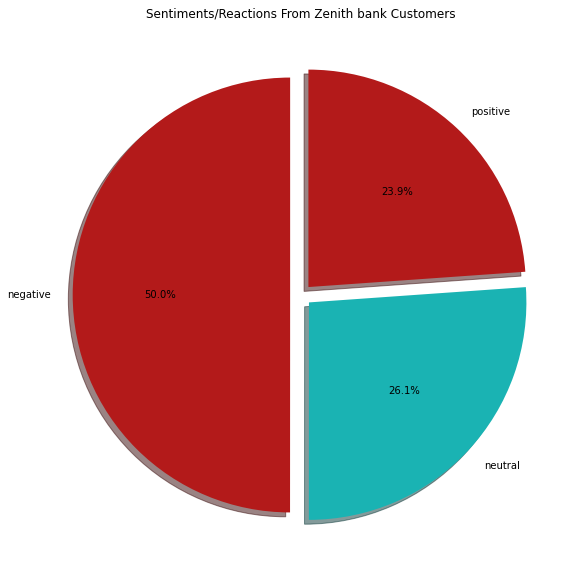

In [51]:
# Plotting a pie chart to show distribution of Sentiments
plt.figure(figsize=[15,10], facecolor='white')
plt.pie(data, labels=['negative', 'neutral','positive'], startangle=90, explode= [0.05, 0.05, 0.05], shadow = True,
        colors=['#b31a1a', '#1ab3b3'], autopct='%1.1f%%');
plt.title('Sentiments/Reactions From Zenith bank Customers');

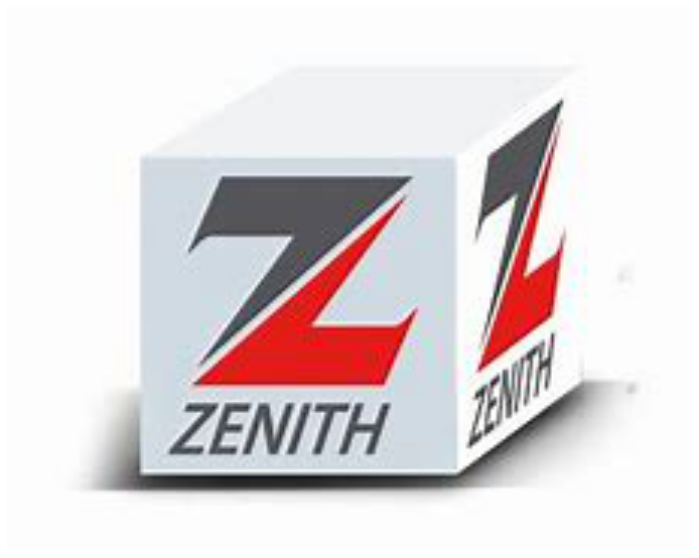

In [52]:
image = np.array(Image.open("Zenith bank logo 2.jpg"))              # Import The Zenithbank logo as an image
    
plt.figure(figsize=[15,10], facecolor="none")                 # Instantiate the figure object

plt.imshow(image, cmap=plt.cm.gray, interpolation="bilinear") # Display data as an image
plt.axis("off")                                               # Remove axis
plt.show()                                

In [53]:
#define a function to design the backgorund of word cloud object

#def word_color_func(word, font_size, position, orientation="horizontal", random_state=None,**kwargs):
#    return "hsl(34, 99%%, %d%%)" % random.randint(50, 80)

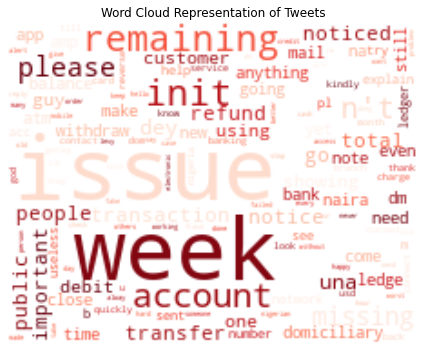

<Figure size 432x288 with 0 Axes>

In [85]:
# Instantiate the Twitter word cloud object
twitter_wc = WordCloud(background_color= "white", mask=image, collocations=False, colormap='Reds_r', max_font_size = 100)

# generate the word cloud
twitter_wc.generate(tweet_list_string)

# display the word cloud
plt.figure(figsize=(10,6))


plt.imshow(twitter_wc.recolor(),
           interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud Representation of Tweets");
plt.show()

# store to file
plt.savefig("womancloud.png", format="png")
plt.show()

## save the datafraome to a csv file and export to Power BI for Dashboard creation

In [ ]:
df.to_csv("Finalized Zenith bank DataFrame.csv", index = False)